# ConnMat

In [6]:
import numpy as np
from gradecc.load_data import Timeseries
from gradecc.load_data.subject import SUBJECTS, Subject
from gradecc.compute.conn_mat import ConnectivityMatrix

cs = [ConnectivityMatrix(Timeseries(s, 'baseline')) for s in SUBJECTS]

In [32]:
# [pd.DataFrame(ConnectivityMatrix(Timeseries(Subject(s), e), centered=cnt), dtype=np.float32
#              ).to_csv('sub'+str(s)+'_'+str(e)+('_Centered' if cnt else '_notCnt')+'.csv')
#  for s in [1,2,3,4,6] for e in EPOCHS for cnt in [True, False]]

In [2]:
np.stack(cs).mean(0)

array([[1.00267267, 0.27731494, 0.29054615, ..., 0.07466188, 0.04154737,
        0.08837985],
       [0.27731494, 1.0014882 , 0.42750426, ..., 0.10152502, 0.04778559,
        0.11109167],
       [0.29054615, 0.42750426, 1.00459339, ..., 0.10125213, 0.0491649 ,
        0.11108443],
       ...,
       [0.07466188, 0.10152502, 0.10125213, ..., 0.99862887, 0.14278038,
        0.32665519],
       [0.04154737, 0.04778559, 0.0491649 , ..., 0.14278038, 1.00073118,
        0.11960653],
       [0.08837985, 0.11109167, 0.11108443, ..., 0.32665519, 0.11960653,
        0.99936907]])

diagonal values

In [4]:
np.diag(np.stack(cs).mean(0))

array([1.00267267, 1.0014882 , 1.00459339, ..., 0.99862887, 1.00073118,
       0.99936907])

<AxesSubplot:ylabel='Count'>

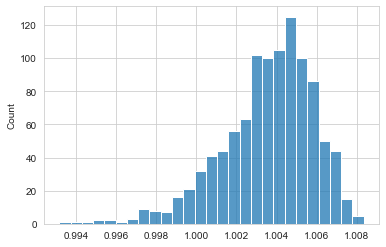

In [5]:
import seaborn as sns

sns.histplot(np.diag(np.stack(cs).mean(0)))

## connmat centered

In [7]:
cs_cnt = [ConnectivityMatrix(Timeseries(Subject(s), 'baseline'), centered=True) for s in [1, 2, 3]]

In [8]:
np.stack(cs_cnt).mean(0)

array([[0.3536825 , 0.04972581, 0.07411867, ..., 0.02683018, 0.00428494,
        0.01784595],
       [0.04972581, 0.31578892, 0.07995173, ..., 0.02526491, 0.00706542,
        0.03344827],
       [0.07411867, 0.07995173, 0.31404152, ..., 0.03335906, 0.01793884,
        0.02808493],
       ...,
       [0.02683018, 0.02526491, 0.03335906, ..., 0.70064167, 0.12512387,
        0.1519004 ],
       [0.00428494, 0.00706542, 0.01793884, ..., 0.12512387, 0.76095849,
        0.03181127],
       [0.01784595, 0.03344827, 0.02808493, ..., 0.1519004 , 0.03181127,
        0.71028133]])

<AxesSubplot:ylabel='Count'>

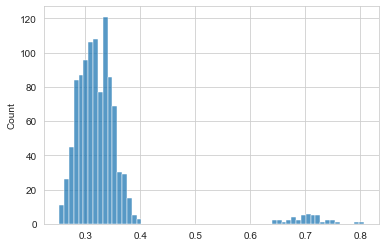

In [10]:
sns.histplot(np.diag(np.stack(cs_cnt).mean(0)))

## what reference grad model?
riemannian mean of cnt mats gives smaller range than euclidean mean

In [13]:
from gradecc.compute.conn_mat.center import mean_riemann_conn_mats, riemann_centered_conn_mat

example centered mat

In [17]:
from gradecc.load_data import EPOCH_REF

np.diag(riemann_centered_conn_mat(Timeseries(1, EPOCH_REF)))

its riemann mean

In [16]:
np.diag(mean_riemann_conn_mats(
    np.stack([riemann_centered_conn_mat(Timeseries(Subject(s), EPOCH_REF)) for s in [1,2,3]])
))

________________________________________________________________________________
[Memory] Calling gradecc.compute.conn_mat.center.riemann_centered_conn_mat...
riemann_centered_conn_mat(<gradecc.load_data.Timeseries object at 0x16d623e50>)
_______________________________________riemann_centered_conn_mat - 18.1s, 0.3min
________________________________________________________________________________
[Memory] Calling gradecc.compute.conn_mat.center.riemann_centered_conn_mat...
riemann_centered_conn_mat(<gradecc.load_data.Timeseries object at 0x16d6235b0>)
_______________________________________riemann_centered_conn_mat - 19.0s, 0.3min
________________________________________________________________________________
[Memory] Calling gradecc.compute.conn_mat.center.riemann_centered_conn_mat...
riemann_centered_conn_mat(<gradecc.load_data.Timeseries object at 0x16d5f7700>)
_______________________________________riemann_centered_conn_mat - 19.1s, 0.3min
________________________________________

array([0.16591272, 0.15598233, 0.15829237, ..., 0.57756956, 0.64273989,
       0.57769131])

its mean

In [25]:
np.diag(np.mean(
    np.stack([riemann_centered_conn_mat(Timeseries(s, epoch_ref)) for s in subjects]), axis=0
))

array([0.36539375, 0.34440367, 0.36470027, ..., 0.74917499, 0.73831786,
       0.75766699])

# Gradients

In [8]:
from gradecc.compute.gradient import Gradients
import pandas as pd
from gradecc.plot import plot_cortex

dfg = pd.concat([Gradients(s, epoch_ref='baseline', centered=False).df for s in SUBJECTS], axis=0)
dfgg = dfg.groupby(['region', 'epoch', 'measure']).mean().drop('subject', axis=1).reset_index()

In [9]:
dfg.head()

,subject,epoch,region,measure,value
0,1,baseline,7Networks_LH_Vis_1,gradient1,0.760897
1,1,baseline,7Networks_LH_Vis_2,gradient1,0.573084
2,1,baseline,7Networks_LH_Vis_3,gradient1,0.777506
3,1,baseline,7Networks_LH_Vis_4,gradient1,-0.400720
4,1,baseline,7Networks_LH_Vis_5,gradient1,0.794058


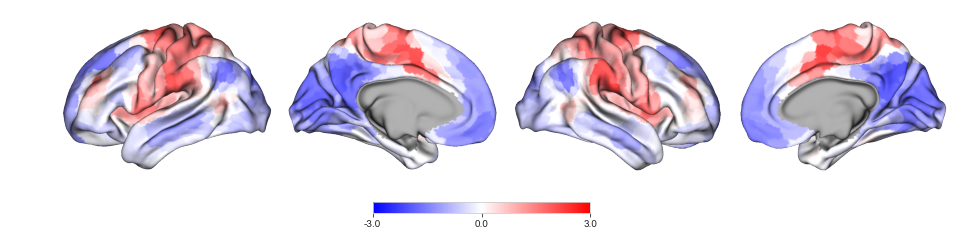

In [28]:
plot_cortex(dfgg[(dfgg.epoch=='baseline') & (dfgg.measure=='gradient1')],
            color_range=(-3, 3), color_map='bwr')

## grad centered

In [10]:
dfcnt = pd.concat([Gradients(s, epoch_ref='baseline', centered=True).df for s in SUBJECTS], axis=0)
dfcnt_ = dfcnt.groupby(['region', 'epoch', 'measure']).mean().drop('subject', axis=1).reset_index()

In [11]:
dfcnt_

,region,epoch,measure,value
0,7Networks_LH_Cont_Cing_1,baseline,gradient1,0.000507
1,7Networks_LH_Cont_Cing_1,baseline,gradient2,0.069170
2,7Networks_LH_Cont_Cing_1,baseline,gradient3,-0.189721
3,7Networks_LH_Cont_Cing_1,baseline,gradient4,-0.030108
4,7Networks_LH_Cont_Cing_1,early,gradient1,-0.040401
...,...,...,...,...
12475,Vermis X,early,gradient4,-0.062106
12476,Vermis X,late,gradient1,0.292791
12477,Vermis X,late,gradient2,-0.016078
12478,Vermis X,late,gradient3,0.053227


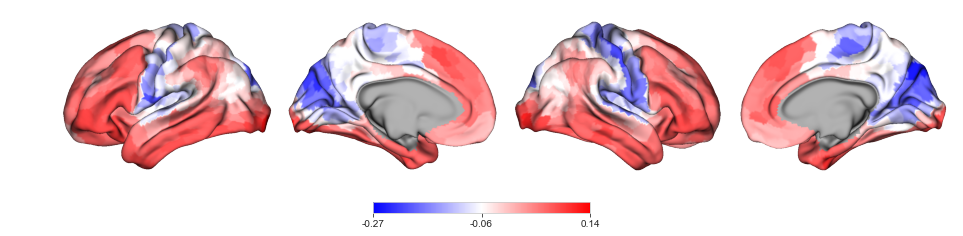

In [13]:
plot_cortex(dfcnt_[(dfcnt_.epoch=='baseline') & (dfcnt_.measure=='gradient1')],
            color_range=None, color_map='bwr')

grad ref model is centered but euclidean mean

In [32]:
dfcnt = pd.concat([Gradients(s, epoch_ref='baseline', centered=True).df for s in SUBJECTS], axis=0)
dfcnt_ = dfcnt.groupby(['region', 'epoch', 'measure']).mean().drop('subject', axis=1).reset_index()

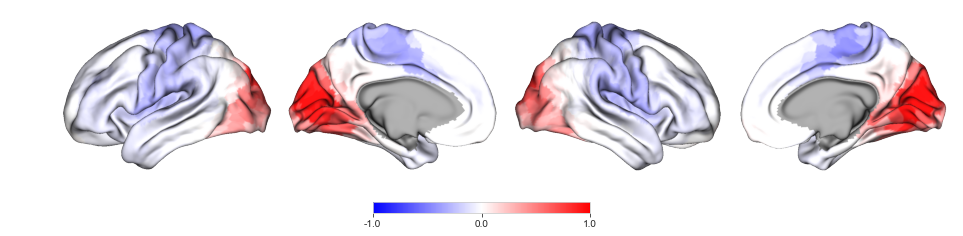

In [33]:
plot_cortex(dfcnt_[(dfcnt_.epoch=='baseline') & (dfcnt_.measure=='gradient1')],
            color_range=(-1, 1), color_map='bwr')

# ecc

In [34]:
from gradecc.compute.measures import _make_eccentricity

dfg = pd.concat([dfg, _make_eccentricity(dfg)], axis=0)
dfg['cnt'] = False
dfcnt = pd.concat([dfcnt, _make_eccentricity(dfcnt)], axis=0)
dfcnt['cnt'] = True

Making eccentricity...


100%|██████████| 118560/118560 [00:00<00:00, 530077.90it/s]


Making eccentricity...


100%|██████████| 118560/118560 [00:00<00:00, 624765.76it/s]


In [35]:
df = pd.concat([dfg, dfcnt], axis=0)

In [36]:
dfavg = df.groupby(['region', 'epoch', 'measure', 'cnt']).mean().drop('subject', axis=1).reset_index()

ecc not cnt and cnt

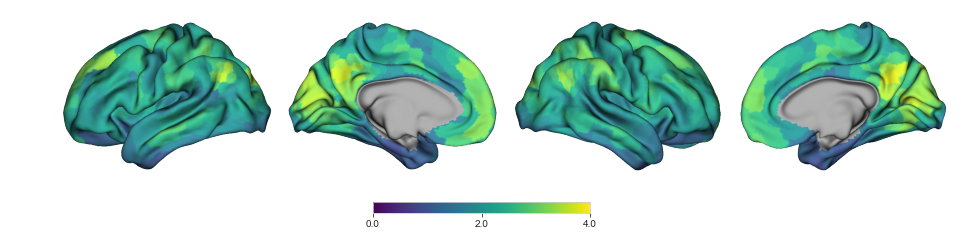

In [37]:
plot_cortex(dfavg[(dfavg.epoch=='baseline') & (dfavg.measure=='eccentricity') & ~(dfavg.cnt)],
            color_range=(0, 4))

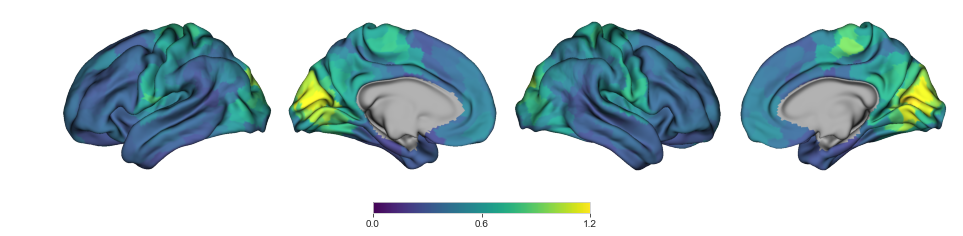

In [53]:
plot_cortex(dfavg[(dfavg.epoch=='baseline') & (dfavg.measure=='eccentricity') & (dfavg.cnt)],
            color_range=(0, 1.2))

# stats
## ttests

In [39]:
from gradecc.stats.pairwise_ttests import make_ttests

dft = make_ttests(df[~df.cnt], save=False)

Computing t-tests...


100%|██████████| 5200/5200 [00:56<00:00, 92.85it/s] 


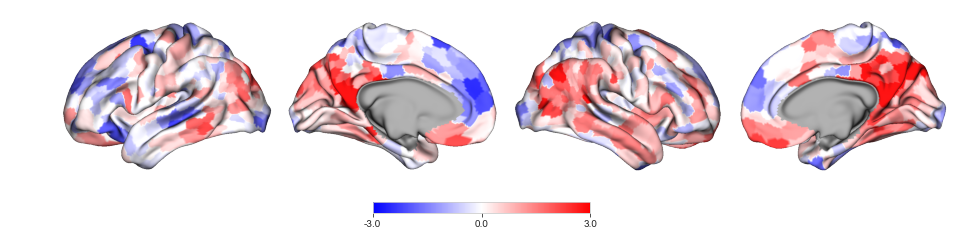

In [41]:
plot_cortex(dft.loc['eccentricity', 'baseline', 'early'], value='tstat',
            color_range=(-3, 3), color_map='bwr')

## anova

### centered

In [42]:
from gradecc.stats.repeated_measures import make_rm_anova

dfrmc = make_rm_anova(df[df.cnt])
dfrmc

Computing repeated measures ANOVA...


100%|██████████| 5200/5200 [00:49<00:00, 104.09it/s]


,region,measure,F,pvalue,fdr_significant,pvalue_corrected
0,7Networks_LH_Cont_Cing_1,eccentricity,1.153185,0.321236,False,0.420233
1,7Networks_LH_Cont_Cing_2,eccentricity,2.865351,0.063303,False,0.133270
2,7Networks_LH_Cont_Cing_3,eccentricity,2.265016,0.110981,False,0.198930
3,7Networks_LH_Cont_Cing_4,eccentricity,0.757782,0.472307,False,0.563949
4,7Networks_LH_Cont_Cing_5,eccentricity,0.652597,0.523662,False,0.605794
...,...,...,...,...,...,...
1035,Vermis VI,gradient4,1.862240,0.162530,False,0.492803
1036,Vermis VIIIa,gradient4,2.101587,0.129501,False,0.438437
1037,Vermis VIIIb,gradient4,3.119446,0.050042,False,0.358924
1038,Vermis VIIb,gradient4,2.622115,0.079391,False,0.403103


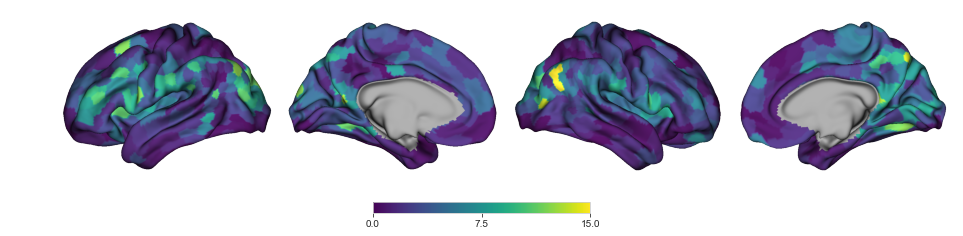

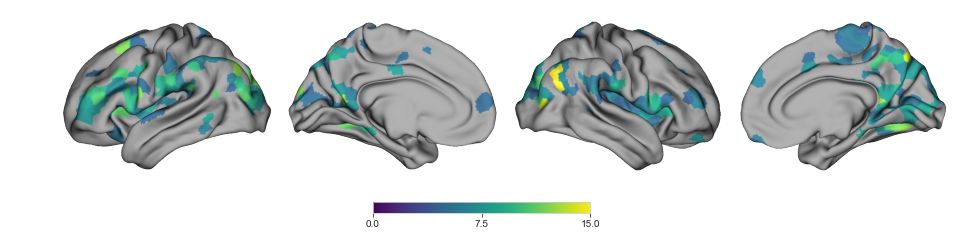

In [65]:
plot_cortex(dfrmc[dfrmc.measure=='eccentricity'], value='F',
            color_range=(0, 15), color_map='viridis')
plot_cortex(dfrmc[dfrmc.measure=='eccentricity'], value='F', mask='pvalue_corrected',
            color_range=(0, 15), color_map='viridis')

### not centered

In [ ]:
dfrm = make_rm_anova(df[~df.cnt])

In [67]:
dfrm

,region,measure,F,pvalue,fdr_significant,pvalue_corrected
0,7Networks_LH_Cont_Cing_1,eccentricity,0.646883,0.526611,False,0.618842
1,7Networks_LH_Cont_Cing_2,eccentricity,3.112070,0.050383,False,0.140750
2,7Networks_LH_Cont_Cing_3,eccentricity,6.019980,0.003782,True,0.038557
3,7Networks_LH_Cont_Cing_4,eccentricity,2.348188,0.102624,False,0.221549
4,7Networks_LH_Cont_Cing_5,eccentricity,0.659973,0.519881,False,0.613011
...,...,...,...,...,...,...
1035,Vermis VI,gradient4,1.640850,0.200788,False,0.506111
1036,Vermis VIIIa,gradient4,1.284331,0.282934,False,0.585907
1037,Vermis VIIIb,gradient4,0.841015,0.435352,False,0.693476
1038,Vermis VIIb,gradient4,1.050494,0.354922,False,0.629795


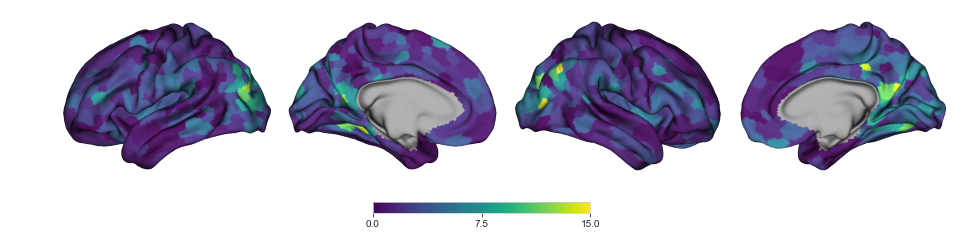

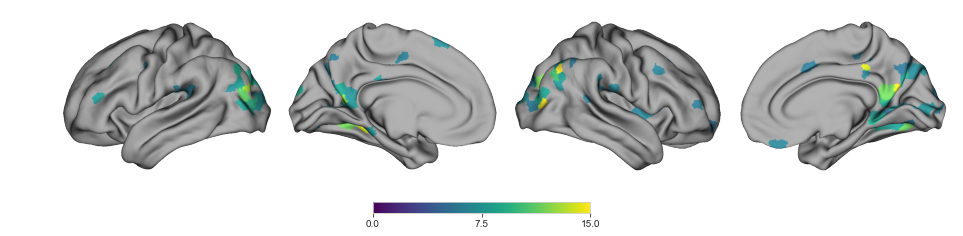

In [66]:
plot_cortex(dfrm[dfrm.measure=='eccentricity'], value='F',
            color_range=(0, 15), color_map='viridis')
plot_cortex(dfrm[dfrm.measure=='eccentricity'], value='F', mask='pvalue_corrected',
            color_range=(0, 15), color_map='viridis')

# jointplot pivot

In [44]:
dfp = df.pivot(index=['subject', 'epoch', 'region', 'cnt'], columns='measure', values='value').reset_index()
dfp.head()

measure,subject,epoch,region,cnt,eccentricity,gradient1,gradient2,gradient3,gradient4
0,1,baseline,7Networks_LH_Cont_Cing_1,False,1.874759,0.205104,0.817630,0.633481,1.550109
1,1,baseline,7Networks_LH_Cont_Cing_1,True,0.325690,-0.141513,0.022776,0.291764,0.020077
2,1,baseline,7Networks_LH_Cont_Cing_2,False,2.350974,0.499685,-1.254177,0.295579,1.901859
3,1,baseline,7Networks_LH_Cont_Cing_2,True,0.560105,-0.038466,-0.324740,0.281681,-0.356985
4,1,baseline,7Networks_LH_Cont_Cing_3,False,3.608202,0.414722,-0.736083,-0.289077,3.495961


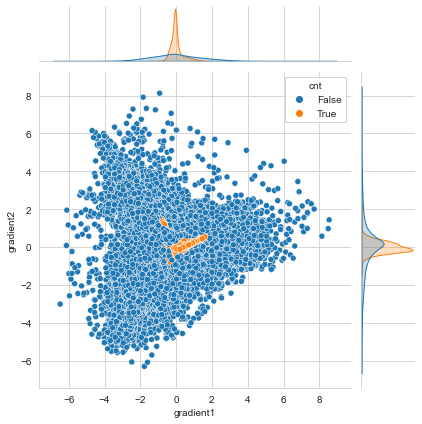

In [45]:
import seaborn as sn

sn.jointplot(data=dfp, x='gradient1', y='gradient2', hue='cnt')

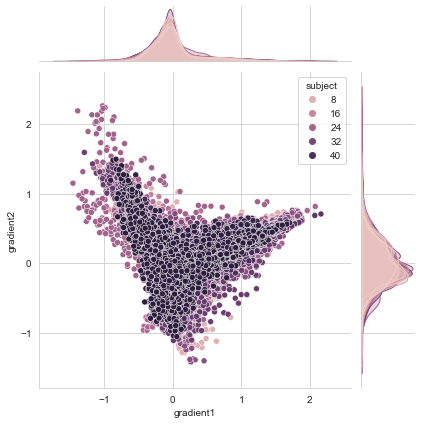

In [46]:
sn.jointplot(data=dfp[dfp.cnt], x='gradient1', y='gradient2', hue='subject')

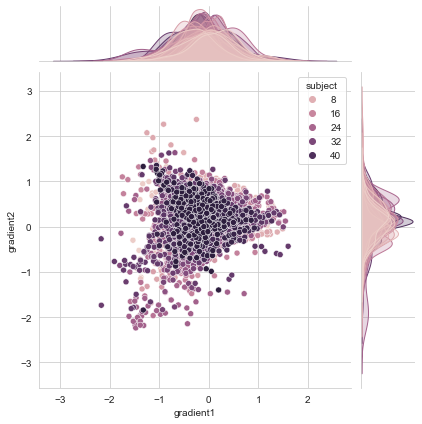

In [58]:
# subcortical
sn.jointplot(data=dfp[~dfp.cnt & ~dfp.region.str.startswith('7Net')],
             x='gradient1', y='gradient2', hue='subject')

# var explained

In [48]:
gs = [Gradients(s, epoch_ref='baseline', centered=False) for s in SUBJECTS]

In [49]:
np.stack([g.lambdas_ for g in gs]).mean(0).mean(0)

array([2.44022795, 1.69230263, 1.17341157, 0.87559899])

In [50]:
gs_cnt = [Gradients(s, epoch_ref='baseline', centered=True) for s in SUBJECTS]

In [51]:
np.stack([g.lambdas_ for g in gs_cnt]).mean(0).mean(0)

array([0.14195112, 0.08650386, 0.06193996, 0.04887003])